## Connect to database

In [2]:
import os
import psycopg2
import pandas as pd

# Database connection
conn = psycopg2.connect(
    dbname="deeplabcut_db",
    user="postgres",
    password="1234",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

### Completely Clear Table First (CAREFUL)

In [12]:
cursor.execute("DELETE FROM dlc_files")
conn.commit()
print("🗑️ All entries deleted from dlc_files.")
# conn.rollback()

🗑️ All entries deleted from dlc_files.


## Insert csv files into columns

In [3]:
# Folder with new CSVs
csv_dir = r"C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered"
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Insert each CSV path
for csv_file in csv_files:
    coord_path = os.path.join(csv_dir, csv_file)

    # Optional: check if already in DB to avoid duplicates
    cursor.execute("SELECT 1 FROM dlc_files WHERE coord_path = %s", (coord_path,))
    exists = cursor.fetchone()
    if exists:
        print(f"⚠️ Already in DB: {csv_file}")
        continue

    cursor.execute("INSERT INTO dlc_files (coord_path) VALUES (%s)", (coord_path,))
    print(f"✅ Inserted: {csv_file}")

conn.commit()
# cursor.close()
print("🎉 All new coord_paths uploaded with video_path = NULL.")


✅ Inserted: Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_bottom_left.csv
✅ Inserted: Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_bottom_right.csv
✅ Inserted: Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_top_left.csv
✅ Inserted: Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_top_right.csv
✅ Inserted: Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S2____Denver_ElPaso_Waco_FtWorth_____Trial_1_bottom_left.csv
✅ Inserted: Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S2____Denver_ElPaso_Waco_FtWorth_____Trial_1_bottom_right.csv
✅ Inserted: Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S2____Denver_ElPaso_Waco_FtWorth_____Trial_1_top_left.csv
✅ Inserted: Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S2____Denver_ElPaso_Waco_FtWorth_____Trial_1_top_right.csv
✅ Inserted: Cre_and_WT_Habituation_Food_and_

## Show first few columns of the dlc_files table

In [4]:
# Read data into DataFrame
df = pd.read_sql_query("SELECT * FROM dlc_files LIMIT 5", conn)

# Optional: show full column content
pd.set_option('display.max_colwidth', None)

# Show first 5 entries
print(df)

conn.close()


   id  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                                                                                                                                           coord_path  \
0   C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_bottom_left.csv   
1  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_bottom_right.csv   
2      C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_top_left.csv   
3     C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1____Houston_Austin_Toronto_Berlin_____Trial_1_top_right.csv   
4      C:\DeepLabCut

C:\Users\FriedmanLab Optogen\AppData\Local\Temp\ipykernel_6980\2517293531.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM dlc_files LIMIT 5", conn)


## Insert animal names

In [5]:
import sys
sys.path.append('../Python_scripts')  # or use absolute path if needed

from update_dlc_table import update_column
update_column("name")

✅ ID 1 → name: Toronto
✅ ID 2 → name: Berlin
✅ ID 3 → name: Houston
✅ ID 4 → name: Austin
✅ ID 5 → name: Waco
✅ ID 6 → name: FtWorth
✅ ID 7 → name: Denver
✅ ID 8 → name: ElPaso
✅ ID 9 → name: Dallas
✅ ID 10 → name: None4
✅ ID 11 → name: Orlando
✅ ID 12 → name: Tampa
✅ ID 13 → name: Rome
✅ ID 14 → name: Venice
✅ ID 15 → name: Lisbon
✅ ID 16 → name: Nirobi
✅ ID 17 → name: LA
✅ ID 18 → name: Phoenix
✅ ID 19 → name: London.
✅ ID 20 → name: Paris
✅ ID 21 → name: Tokyo
✅ ID 22 → name: Ruidoso
✅ ID 23 → name: Chicago
✅ ID 24 → name: LasCruces
✅ ID 25 → name: Orelans
✅ ID 26 → name: Atlanta
✅ ID 27 → name: None3
✅ ID 28 → name: None4
✅ ID 29 → name: Seattle
✅ ID 30 → name: None2
✅ ID 31 → name: C
✅ ID 32 → name: D
✅ ID 33 → name: A
✅ ID 34 → name: B
✅ ID 35 → name: G
✅ ID 36 → name: H
✅ ID 37 → name: E
✅ ID 38 → name: L
✅ ID 39 → name: None3
✅ ID 40 → name: None4
✅ ID 41 → name: F
✅ ID 42 → name: None2
✅ ID 43 → name: P
✅ ID 44 → name: Q
✅ ID 45 → name: N
✅ ID 46 → name: M
✅ ID 47 → name: G
✅ 

## Insert maze number

In [6]:
import sys
sys.path.append('../Python_scripts')

from update_dlc_table import update_column
update_column("maze")

✅ ID 287 → maze: 3
✅ ID 288 → maze: 4
✅ ID 455 → maze: 3
✅ ID 456 → maze: 4
✅ ID 487 → maze: 3
✅ ID 488 → maze: 4
✅ ID 699 → maze: 3
✅ ID 700 → maze: 4
✅ ID 763 → maze: 3
✅ ID 764 → maze: 4
✅ ID 795 → maze: 3
✅ ID 796 → maze: 4
✅ ID 887 → maze: 3
✅ ID 888 → maze: 4
✅ ID 1 → maze: 3
✅ ID 2 → maze: 4
✅ ID 3 → maze: 1
✅ ID 4 → maze: 2
✅ ID 5 → maze: 3
✅ ID 6 → maze: 4
✅ ID 7 → maze: 1
✅ ID 8 → maze: 2
✅ ID 9 → maze: 3
✅ ID 10 → maze: 4
✅ ID 11 → maze: 1
✅ ID 12 → maze: 2
✅ ID 13 → maze: 3
✅ ID 14 → maze: 4
✅ ID 15 → maze: 1
✅ ID 16 → maze: 2
✅ ID 17 → maze: 3
✅ ID 18 → maze: 4
✅ ID 19 → maze: 1
✅ ID 20 → maze: 2
✅ ID 21 → maze: 3
✅ ID 22 → maze: 4
✅ ID 23 → maze: 1
✅ ID 24 → maze: 2
✅ ID 25 → maze: 1
✅ ID 26 → maze: 2
✅ ID 27 → maze: 3
✅ ID 28 → maze: 4
✅ ID 29 → maze: 1
✅ ID 30 → maze: 2
✅ ID 31 → maze: 3
✅ ID 32 → maze: 4
✅ ID 33 → maze: 1
✅ ID 34 → maze: 2
✅ ID 35 → maze: 3
✅ ID 36 → maze: 4
✅ ID 37 → maze: 1
✅ ID 38 → maze: 2
✅ ID 39 → maze: 3
✅ ID 40 → maze: 4
✅ ID 41 → maze: 1
✅ ID 

### Load fresh vesion of update_dlc_table if you have made changes

In [36]:
import importlib
import update_dlc_table  # or: from update_dlc_table import update_column

importlib.reload(update_dlc_table)
update_dlc_table.update_column("maze")

✅ ID 738 → maze: 3
✅ ID 661 → maze: 2
✅ ID 662 → maze: 3
✅ ID 663 → maze: 4
✅ ID 664 → maze: 1
✅ ID 665 → maze: 2
✅ ID 666 → maze: 3
✅ ID 667 → maze: 4
✅ ID 668 → maze: 1
✅ ID 669 → maze: 2
✅ ID 670 → maze: 3
✅ ID 671 → maze: 4
✅ ID 672 → maze: 1
✅ ID 673 → maze: 2
✅ ID 674 → maze: 3
✅ ID 675 → maze: 4
✅ ID 676 → maze: 1
✅ ID 677 → maze: 2
✅ ID 678 → maze: 3
✅ ID 679 → maze: 4
✅ ID 680 → maze: 1
✅ ID 681 → maze: 2
✅ ID 682 → maze: 3
✅ ID 683 → maze: 4
✅ ID 684 → maze: 1
✅ ID 685 → maze: 2
✅ ID 686 → maze: 3
✅ ID 687 → maze: 4
✅ ID 688 → maze: 1
✅ ID 689 → maze: 2
✅ ID 690 → maze: 3
✅ ID 691 → maze: 4
✅ ID 692 → maze: 1
✅ ID 693 → maze: 2
✅ ID 694 → maze: 3
✅ ID 695 → maze: 4
✅ ID 696 → maze: 1
✅ ID 697 → maze: 2
✅ ID 698 → maze: 3
✅ ID 699 → maze: 4
✅ ID 700 → maze: 1
✅ ID 701 → maze: 2
✅ ID 702 → maze: 3
✅ ID 703 → maze: 4
✅ ID 704 → maze: 1
✅ ID 705 → maze: 2
✅ ID 706 → maze: 3
✅ ID 707 → maze: 4
✅ ID 708 → maze: 1
✅ ID 709 → maze: 2
✅ ID 710 → maze: 3
✅ ID 711 → maze: 4
✅ ID 712 → m

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def custom_bar_plot(means, errors, labels, colors, title='Bar Plot', ylabel='Value'):
    """
    Generate a bar plot with standard error bars and custom face colors.

    Parameters:
    - means: list or array of means (use np.nan for missing bars)
    - errors: list or array of standard errors (use np.nan for missing error bars)
    - labels: list of labels for the x-axis
    - colors: list of colors for each bar
    - title: (optional) title of the plot
    - ylabel: (optional) y-axis label
    """
    x = np.arange(len(means))

    fig, ax = plt.subplots()

    for i in range(len(means)):
        if not np.isnan(means[i]):
            ax.bar(
                x[i],
                means[i],
                yerr=errors[i],
                capsize=5,
                color=colors[i],
                edgecolor='black'
            )

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

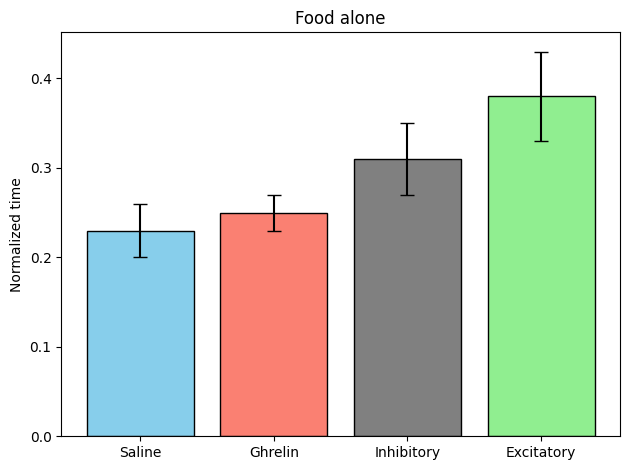

In [9]:
means = [0.23, 0.25, 0.31, 0.38]
errors = [0.03, 0.02, 0.04, 0.05]
labels = ['Saline', 'Ghrelin', 'Inhibitory', 'Excitatory']
colors = ['skyblue', 'salmon', 'gray', 'lightgreen']

custom_bar_plot(means, errors, labels, colors, title='Food alone', ylabel='Normalized time')

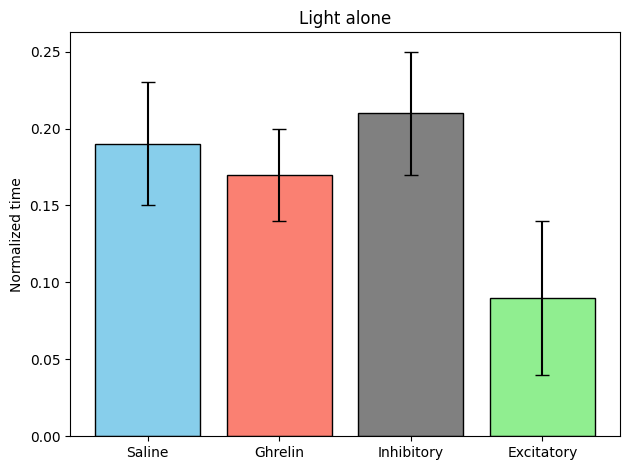

In [10]:
means = [0.19, 0.17, 0.21, 0.09]
errors = [0.04, 0.03, 0.04, 0.05]
labels = ['Saline', 'Ghrelin', 'Inhibitory', 'Excitatory']
colors = ['skyblue', 'salmon', 'gray', 'lightgreen']

custom_bar_plot(means, errors, labels, colors, title='Light alone', ylabel='Normalized time')

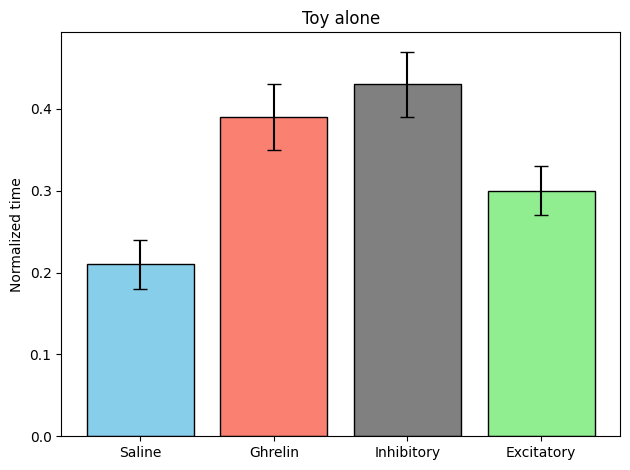

In [11]:
means = [0.21, 0.39, 0.43, 0.30]
errors = [0.03, 0.04, 0.04, 0.03]
labels = ['Saline', 'Ghrelin', 'Inhibitory', 'Excitatory']
colors = ['skyblue', 'salmon', 'gray', 'lightgreen']

custom_bar_plot(means, errors, labels, colors, title='Toy alone', ylabel='Normalized time')

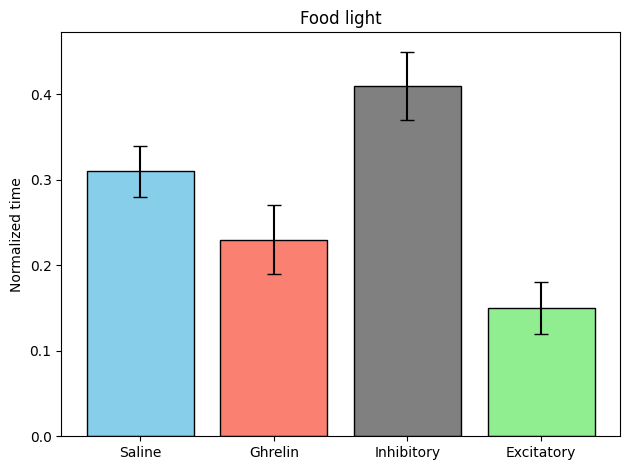

In [13]:
means = [0.31, 0.23, 0.41, 0.15]
errors = [0.03, 0.04, 0.04, 0.03]
labels = ['Saline', 'Ghrelin', 'Inhibitory', 'Excitatory']
colors = ['skyblue', 'salmon', 'gray', 'lightgreen']

custom_bar_plot(means, errors, labels, colors, title='Food light', ylabel='Normalized time')

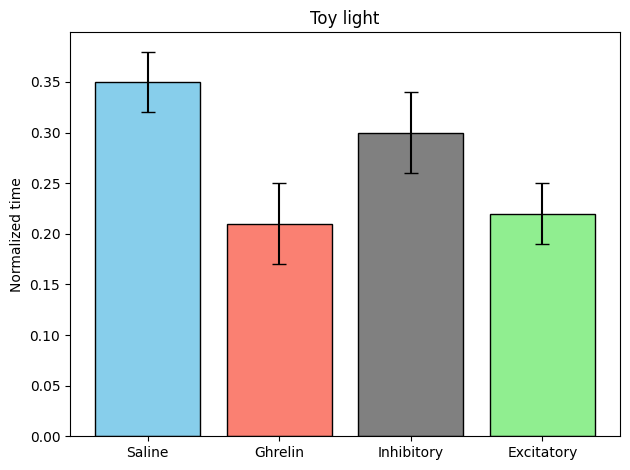

In [15]:
means = [0.35, 0.21, 0.30, 0.22]
errors = [0.03, 0.04, 0.04, 0.03]
labels = ['Saline', 'Ghrelin', 'Inhibitory', 'Excitatory']
colors = ['skyblue', 'salmon', 'gray', 'lightgreen']

custom_bar_plot(means, errors, labels, colors, title='Toy light', ylabel='Normalized time')